# Midterm
### Author: Min Set Khant
### Date: 27 September 2025

# Introduction

**Please find the published Midterm assignment prompt here: **

In 2020, employees of Blizzard Entertainment circulated a spreadsheet to anonymously share salaries and recent pay increases amidst rising tension in the video game industry over wage disparities and executive compensation. (Source: [Blizzard Workers Share Salaries in Revolt Over Pay](https://www.bloomberg.com/news/articles/2020-08-03/blizzard-workers-share-salaries-in-revolt-over-wage-disparities))

The name of the data frame used for this analysis is `blizzard_salary` and the variables are:

- `percent_incr`: Raise given in July 2020, as percent increase with values ranging from 1 (1% increase) to 21.5 (21.5% increase)

- `salary_type`: Type of salary, with levels `Hourly` and `Salaried`

- `annual_salary`: Annual salary, in USD, with values ranging from $50,939 to $216,856.

- `performance_rating`: Most recent review performance rating, with levels `Poor`, `Successful`, `High`, and `Top`. The `Poor` level is the lowest rating and the `Top` level is the highest rating.

The top ten rows and `.info` of `blizzard_salary` are shown below:

```
   percent_incr salary_type  annual_salary performance_rating
0           1.0        year            1.0               High
1           1.0        year            1.0         Successful
2           1.0        year            1.0               High
3           1.0      Hourly        33987.2         Successful
4           NaN      Hourly        34798.4               High
5           NaN      Hourly        35360.0                NaN
6           NaN      Hourly        37440.0                NaN
7           0.0      Hourly        37814.4                NaN
8           4.0      Hourly        41100.8                Top
9           1.2      Hourly        42328.0                NaN

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 465
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   percent_incr        370 non-null    float64
 1   salary_type         409 non-null    object 
 2   annual_salary       409 non-null    float64
 3   performance_rating  298 non-null    object 
dtypes: float64(2), object(2)
memory usage: 16.0+ KB
None
```

## Required lbraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
blizzard_salary = pd.read_csv("data/blizzard_salary.csv")

# Show first few rows and dataset info
print(blizzard_salary.head())
print(blizzard_salary.info())


   Unnamed: 0      timestamp              status     current_title  \
0           1   8/6/20 18:57  Full Time Employee        Consultant   
1           2   8/6/20 18:56  Full Time Employee          Engineer   
2           3   8/6/20 18:56  Full Time Employee          Engineer   
3           4  7/31/20 16:50  Full Time Employee  Customer Support   
4           5  3/11/21 10:28  Full Time Employee       Game Master   

   current_salary salary_type  percent_incr  \
0            1.00        year           1.0   
1            1.00        year           1.0   
2            1.00        year           1.0   
3           16.34        hour           1.0   
4           16.73        hour           NaN   

                                    other_info location performance_rating  
0                                          NaN   Irvine               High  
1                                          NaN   Irvine         Successful  
2                                          NaN   Irvine          

**Run All** in the document which loads these packages with the `import` function.

## Guidelines


Remember that continuing to develop a sound workflow for reproducible data analysis is important as you complete the lab and other assignments in this course.
There will be periodic reminders in this assignment to remind you to **Run all, commit, and sync** your changes to GitHub.
You should have at least 3 commits with meaningful commit messages by the end of the assignment.


Use the remainder of this `.ipynb` to answer the questions however you see fit. Show all code and outputs where applicable

## Question 1 

In [8]:
# # Check dataset shape, variable types, etc.
rows, cols = blizzard_salary.shape
print(f"Rows: {rows}, Columns: {cols}")

print("Data Types:")
print(blizzard_salary.dtypes)   



Rows: 466, Columns: 10
Data Types:
Unnamed: 0              int64
timestamp              object
status                 object
current_title          object
current_salary        float64
salary_type            object
percent_incr          float64
other_info             object
location               object
performance_rating     object
dtype: object


### Question_1_Answer
The right choices are:

c. Each row represents a Blizzard Entertainment worker who filled out the spreadsheet.

f. The annual_salary (here current_salary) variable is numerical.

g. The performance_rating variable is categorical and ordinal.

## Question 2

### Question_2_Answer
Best figure: Facet layout with distributions side-by-side (across columns).

**Why**

Placing the histograms next to each other shares the same x-axis, making it easy to directly compare where the bulk of the data and the medians fall. A vertical (stacked) layout requires more eye movement and makes comparisons less clear. Even better, a side-by-side boxplot shows the medians explicitly, along with spread and outliers, providing the clearest comparison of median annual salaries between hourly and salaried workers.

## Question 3

In [13]:
blizzard_summary = blizzard_salary.groupby('salary_type').agg(
    mean_annual_salary=('current_salary', 'mean'),
    median_annual_salary=('current_salary', 'median')
).reset_index()

print(blizzard_summary)


  salary_type  mean_annual_salary  median_annual_salary
0        hour           30.290000                 26.08
1        week         1625.000000               1625.00
2        year        90182.721272              83381.00


### Question_3_Answer
The best estimate for that erased value is "c. 80,000".



## Question 4

In [15]:
blizzard_salary_clean = blizzard_salary.copy()

blizzard_salary_clean["salary_type"] = blizzard_salary_clean["salary_type"].map({
    "hour": "Hourly",
    "week": "Hourly",
    "year": "Salaried"
})
# Calculate salary for hourly workers
std_summary = blizzard_salary_clean.groupby("salary_type")["current_salary"].std()
print(std_summary)

salary_type
Hourly        199.632977
Salaried    41400.561032
Name: current_salary, dtype: float64


### Question_4_Answer
The standard deviation for Salaried workers is vastly higher than for Hourly workers.

## Question 5

In [20]:
# Clean up salary_type to match "Hourly" vs "Salaried"
blizzard_salary_clean = blizzard_salary.copy()
blizzard_salary_clean["salary_type"] = blizzard_salary_clean["salary_type"].map({
    "hour": "Hourly",
    "week": "Hourly",
    "year": "Salaried"
})

# Compute group means
means = blizzard_salary_clean.groupby("salary_type")["current_salary"].mean()

# Set plot style
sns.set_style("whitegrid")

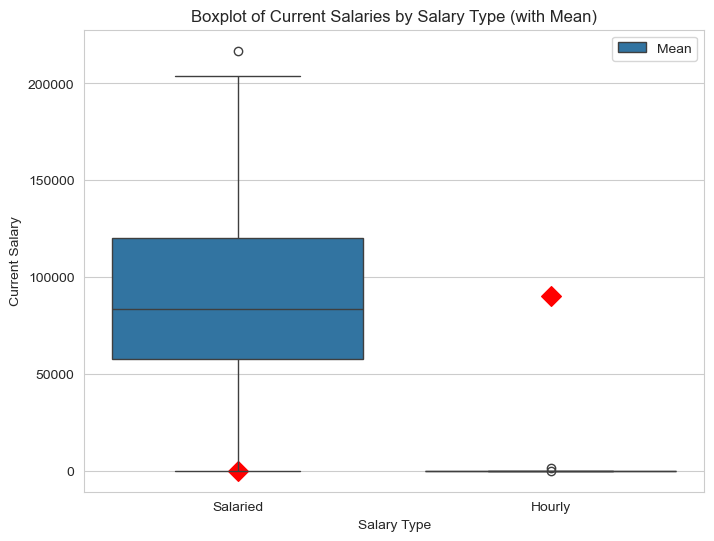

In [21]:
# Create Boxplot with mean
plt.figure(figsize=(8, 6))
sns.boxplot(data=blizzard_salary_clean, x="salary_type", y="current_salary")
for i, (stype, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color="red", marker="D", s=100, label="Mean" if i == 0 else "")
plt.title("Boxplot of Current Salaries by Salary Type (with Mean)")
plt.ylabel("Current Salary")
plt.xlabel("Salary Type")
plt.legend(["Mean"])
plt.show()


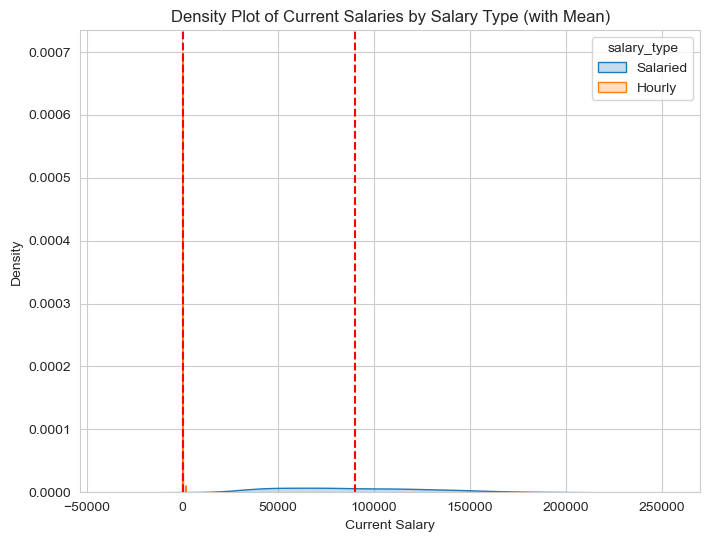

In [22]:
# Create the density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=blizzard_salary_clean, x="current_salary", hue="salary_type", fill=True)
# Add vertical lines for means
for stype, mean_val in means.items():
    plt.axvline(mean_val, color="red", linestyle="--")
plt.title("Density Plot of Current Salaries by Salary Type (with Mean)")
plt.xlabel("Current Salary")
plt.ylabel("Density")
plt.show()


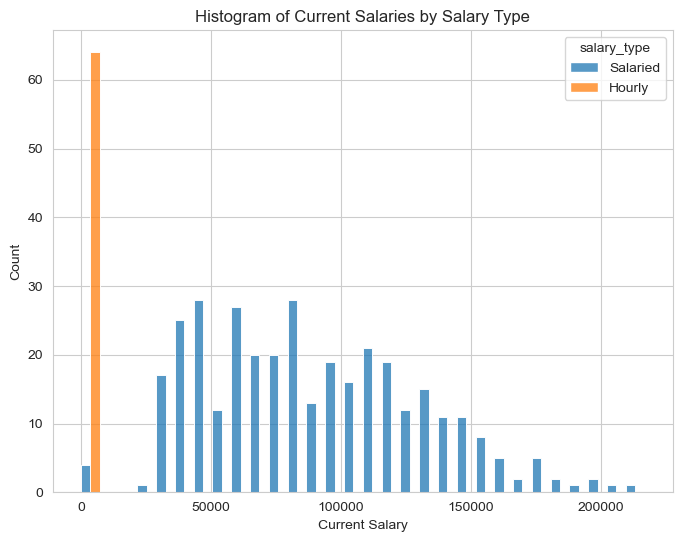

In [23]:
# Create the histogram 
plt.figure(figsize=(8, 6))
sns.histplot(data=blizzard_salary_clean, x="current_salary", hue="salary_type", bins=30, kde=False, multiple="dodge")
plt.title("Histogram of Current Salaries by Salary Type")
plt.xlabel("Current Salary")
plt.ylabel("Count")
plt.show()

### Question_5_Answer
The best plots for visualizing the distributions of annual salaries are box plots, density plots, and histograms.

- Box plots clearly show the median, spread, quartiles, and outliers for Hourly vs Salaried workers.

- Density plots provide a smooth view of the distribution shape, making it easy to compare the two groups.

- Histograms display the frequency of salaries in bins, helping to see where most salaries fall.

- Pie charts, waffle charts, and scatterplots are not suitable, because they do not show the distribution of a numeric variable effectively.

## Question 6

In [ ]:
blizzard_salary['performance_rating'] = pd.Categorical(
    blizzard_salary['performance_rating'],           
    categories=["Poor", "Successful", "High", "Top"],
    ordered=True
)

# Optional: Check the transformation
print(blizzard_salary['performance_rating'].head())

0          High
1    Successful
2          High
3    Successful
4          High
Name: performance_rating, dtype: category
Categories (4, object): ['Poor' < 'Successful' < 'High' < 'Top']


### Question_6_Answer
Correct choice: b. .Categorical()

 This function sets categorical ordering for performance_rating.

## Question 7

### Question_7_Answer
Correct choice: a. "Poor", "Successful", "High", "Top"

 We want ratings ordered from lowest to highest.

## Question 8

### Question_8_Answer

Use Figure 3(b) (proportion plot) for the final report. It standardizes comparisons between Hourly and Salaried workers, avoiding misleading impressions caused by differences in group sizes.


**Salaried workers tend to have higher performance ratings, with most rated High or Top, while Hourly workers are more evenly distributed across the lower categories.**

## Question 9

### Question_9_Answer

Figure 3(a) shows fewer observations than the dataset because some rows have missing values for performance_rating. Bar plots automatically omit these NaN values, which reduces the total counts displayed.

## Question 10

performance_rating  Poor  Successful      High       Top
salary_type                                             
Hourly               0.0    0.685714  0.200000  0.114286
Salaried             0.0    0.523810  0.408163  0.068027


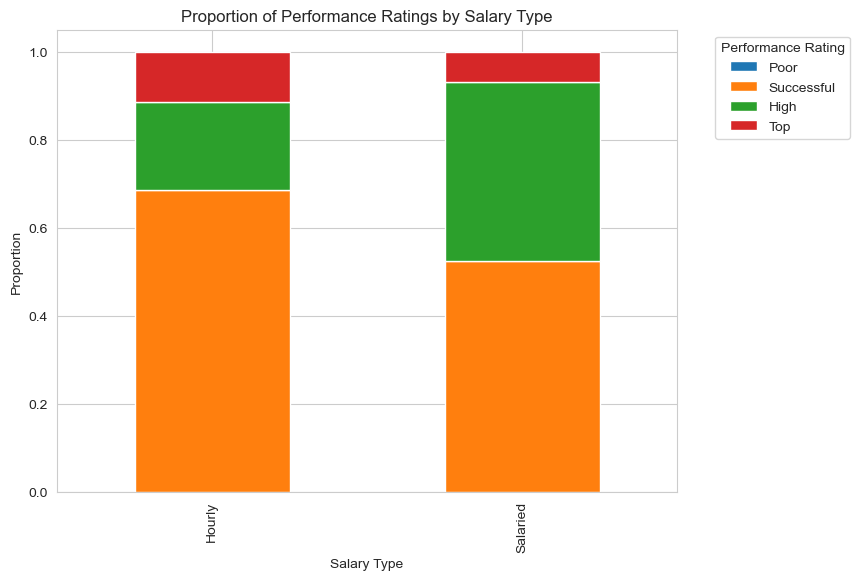

In [27]:
# Clean salary_type
blizzard_salary_clean = blizzard_salary.copy()
blizzard_salary_clean["salary_type"] = blizzard_salary_clean["salary_type"].map({
    "hour": "Hourly",
    "week": "Hourly",
    "year": "Salaried"
})

# Transform performance_rating as ordered categorical
blizzard_salary_clean['performance_rating'] = pd.Categorical(
    blizzard_salary_clean['performance_rating'],
    categories=["Poor", "Successful", "High", "Top"],
    ordered=True
)

# Compute proportions
prop_table = blizzard_salary_clean.groupby('salary_type')['performance_rating'].value_counts(normalize=True).unstack()
print(prop_table)

# Stacked bar chart
prop_table.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Proportion of Performance Ratings by Salary Type")
plt.ylabel("Proportion")
plt.xlabel("Salary Type")
plt.legend(title="Performance Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Interpretation

The stacked proportion plot shows that Salaried workers have a much higher proportion of *"High"* performance ratings compared to Hourly workers. Hourly workers are more concentrated in the Successful category, with very few rated Top. This matches the proportions table and makes it easy to compare performance distributions fairly between the two salary types.

## Question 11

In [32]:
# Filter rows where salary_type is not hourly (exclude "hour" and "week") AND performance_rating is Poor
filtered_df = blizzard_salary[
    (~blizzard_salary['salary_type'].isin(["hour", "week"])) & 
    (blizzard_salary['performance_rating'] == "Poor")
]

# Sort the filtered dataframe by current_salary
filtered_df = filtered_df.sort_values(by='current_salary')
print(filtered_df)

Empty DataFrame
Columns: [Unnamed: 0, timestamp, status, current_title, current_salary, salary_type, percent_incr, other_info, location, performance_rating]
Index: []


### Question_11_Answer
(1) != → select rows where salary_type is not hourly

(2) & → combine conditions with AND

so, the answer is option "c"

## Question 12

### Question_12_Answer
".sort_values()" function go into blank (3).


## Question 13

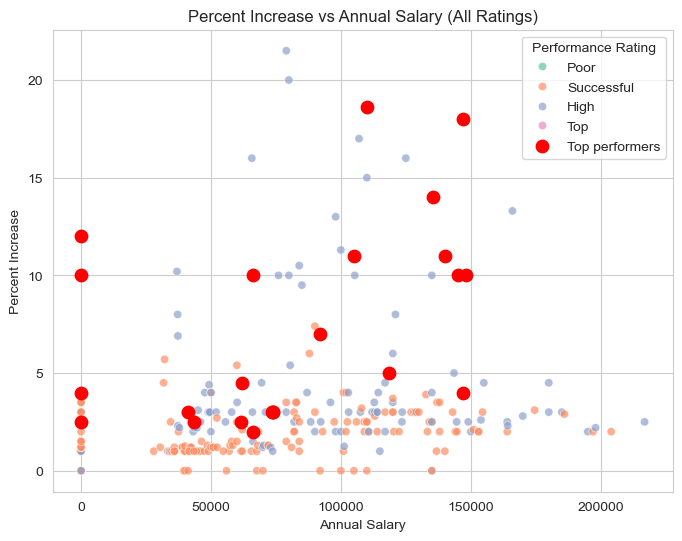

In [38]:
# Filter data for Top performers
plt.figure(figsize=(8,6))
sns.scatterplot(data=blizzard_salary, x='current_salary', y='percent_incr', hue='performance_rating', palette='Set2', alpha=0.7)
plt.scatter(top_perf['current_salary'], top_perf['percent_incr'], color='red', s=80, label='Top performers')
plt.title('Percent Increase vs Annual Salary (All Ratings)')
plt.xlabel('Annual Salary')
plt.ylabel('Percent Increase')
plt.legend(title='Performance Rating')
plt.show()


### Question_13_Answer
Correct options are as follows

c. The interpretation doesn’t mention the linear form.


d. It doesn’t mention the strength of the relationship.


e. The outlier isn’t clearly identified.


f. The interpretation is causal; this is observational data, so causation isn’t proven.



## Question 14

/var/folders/jf/1b91kr5d1k773y5y7tm0sfbh0000gn/T/ipykernel_53137/4288170323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=blizzard_salary, x='performance_rating', y='percent_incr', palette='Set2')


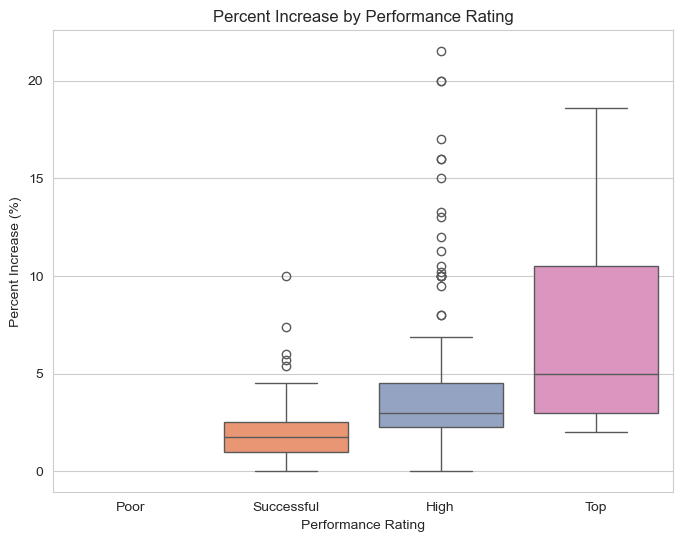

In [41]:
# --- Part 1: Improved Boxplot ---
plt.figure(figsize=(8,6))
sns.boxplot(data=blizzard_salary, x='performance_rating', y='percent_incr', palette='Set2')
plt.title('Percent Increase by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Increase (%)')
plt.show()

/var/folders/jf/1b91kr5d1k773y5y7tm0sfbh0000gn/T/ipykernel_53137/3182150255.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=blizzard_salary, x='performance_rating_filled', y='percent_incr', palette='Set2')


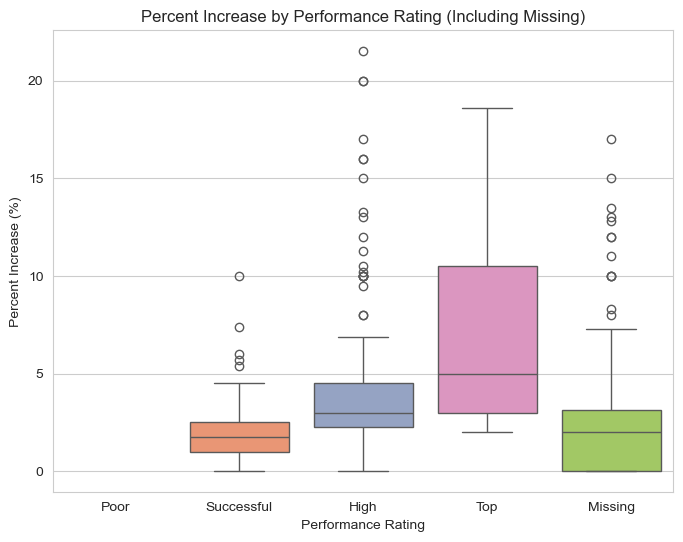

In [42]:
# --- Part 2: Show Missing Values ---
# Add 'Missing' category for categorical column
blizzard_salary['performance_rating'] = blizzard_salary['performance_rating'].cat.add_categories('Missing')

# Fill missing values with 'Missing'
blizzard_salary['performance_rating_filled'] = blizzard_salary['performance_rating'].fillna('Missing')

# Plot again including missing values
plt.figure(figsize=(8,6))
sns.boxplot(data=blizzard_salary, x='performance_rating_filled', y='percent_incr', palette='Set2')
plt.title('Percent Increase by Performance Rating (Including Missing)')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Increase (%)')
plt.show()


### Question_14_Answer

#### Part 1: Things to Improve

Add figure size — default is too small for multiple categories.

Add title and informative labels — improves clarity.

Handle missing values — sns.boxplot drops NaNs by default.

Improve style/readability — use colors (palette), adjust font size, show outliers clearly.

#### Part 2:  show missing values in this plot
Since performance_rating is categorical, we must first add “Missing” to categories.

## Question 15

### Question_14_Answer
#### Part 1
- Render: Convert the Quarto document into a viewable format (HTML/PDF).

- Commit: Save a snapshot of your changes in your local Git repository.

- Push: Send your committed changes to the remote Git repository (GitHub).

#### Part 2
Correct option is
- "c. I didn’t yet push my changes, it’s expected that you are not seeing them on GitHub when you look at it in your web browser. Wait until I push, and check again."

### Concept I Struggled With: Handling Categorical Data

I’ve been struggling with categorical variables, especially ordinal categories like performance ratings. Unlike numeric data, we can’t directly do calculations or fill missing values without defining categories first. I learned that using pd.Categorical() lets we set the categories explicitly and order them, which is important for proper sorting, grouping, and plotting. This helps ensure plots like bar charts or boxplots display data in the correct logical order and include missing or new categories if needed.

# Wrap-up

## Submission

Before you wrap up the midterm assignment, make sure all of your documents are updated on your GitHub repo.
We will be checking these to make sure you have been practicing how to commit and push changes.

You must turn in the `.ipynb` file by the submission deadline to be considered "on time".


## Checklist

Make sure you have:

-   attempted all questions
-   run all code in your Jupyter notebook
-   committed and pushed everything to your GitHub repository such that the Git pane in VS Code is empty


## Grading

The midterm is graded out of a total of 100 points.


1. **Question 1**: 10 points

2. **Question 2**: 5 points

3. **Question 3**: 5 points

4. **Question 4**: 5 points

5. **Question 5**: 10 points

6. **Question 6**: 5 points
   
7. **Question 7**: 5 points

8. **Question 8**: 10 points

9. **Question 9**: 5 points

10. **Question 10**: 5 points

11. **Question 11**: 5 points

12. **Question 12**: 5 points

13. **Question 13**: 10 points

14. **Question 14**: 10 points
    - Part 1: (5 points).
    - Part 2: (5 points).

15. **Question 15**: 10 points
    - Part 1: (5 points).
    - Part 2: (5 points).

Total: **100 points**
